In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
capacity_data = pd.read_csv('acetic acid capacity data_csv.csv')

In [3]:
capacity_data

,Year,Capacity(in MT)
0,2011-12,387380
1,2012-13,272580
2,2013-14,272580
3,2014-15,177430
4,2015-16,177430
5,2016-17,177430
6,2017-18,159620
7,2018-19,141620
8,2019-20,142050


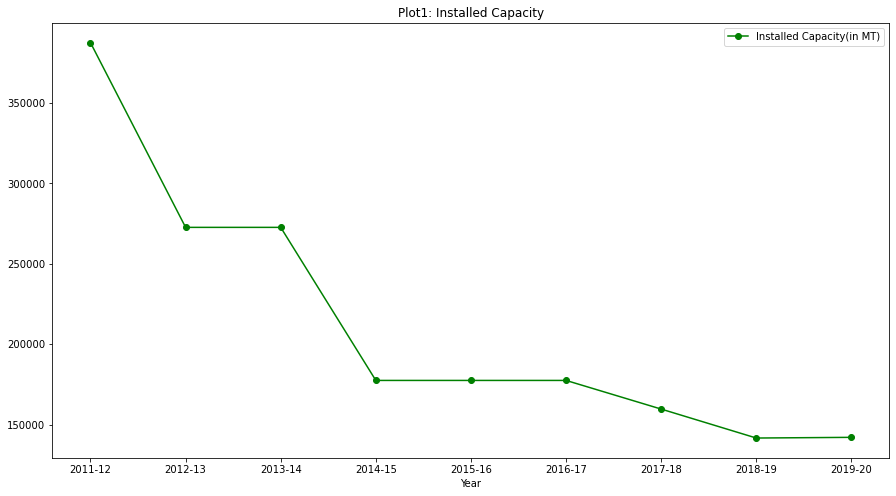

In [4]:
capacity_data.plot(figsize=(15,8), x = 'Year', y= 'Capacity(in MT)', marker = 'o', color = 'green', label = 'Installed Capacity(in MT)', title = 'Plot1: Installed Capacity')

In [5]:
data = pd.read_csv('acetic acid production data_csv.csv')

In [6]:
data.head()

,Year,Production(in MT)
0,2001-02,232005
1,2002-03,251683
2,2003-04,308084
3,2004-05,287901
4,2005-06,321840


In [7]:
temp_data = data.copy()
data

,Year,Production(in MT)
0,2001-02,232005
1,2002-03,251683
2,2003-04,308084
3,2004-05,287901
4,2005-06,321840
5,2006-07,297480
6,2007-08,341810
7,2008-09,214040
8,2009-10,146440
9,2010-11,156480


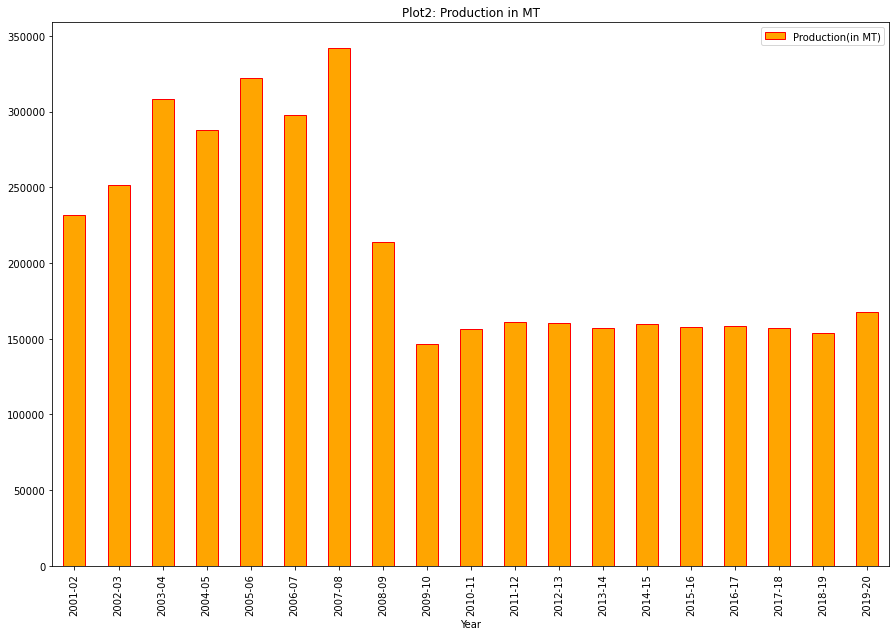

In [8]:
data.plot.bar(x = 'Year', y = 'Production(in MT)', figsize=(15,10), title = 'Plot2: Production in MT', color = 'orange', edgecolor = 'red')

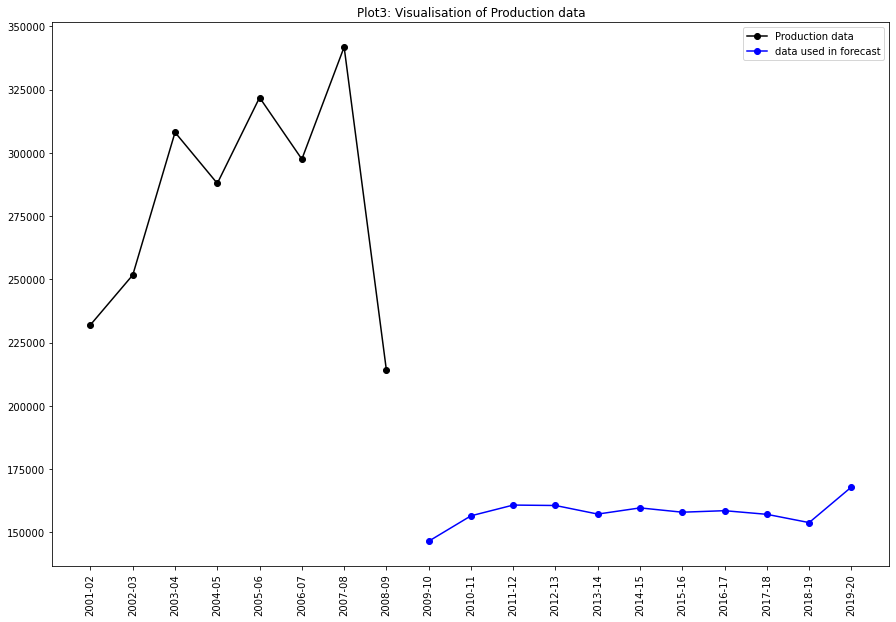

In [9]:
ax = data[0:8].plot( marker = 'o', color = 'black',figsize = (15,10), legend = None, title = 'Plot3: Visualisation of Production data');
data[8:19].plot( marker = 'o', color = 'blue', ax=ax);
ax.set_xticks(data.index);
ax.set_xticklabels(data['Year'], rotation = 90);
ax.legend(['Production data','data used in forecast']);
# temp_data = data[8:19]
# temp_data.head()
# temp_data.plot(x = 'Year', y = 'Production(in MT)', marker = 'o', color = 'black', ax=ax)

In [10]:
year = []
for x in data['Year']:
    year.append(x[0:4])
print(year)

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [11]:
data['Year(num)'] = year
data['Year(num)'] = pd.to_datetime(data['Year(num)'])
data.set_index('Year(num)', inplace = True)
data

,Year,Production(in MT)
Year(num),,
2001-01-01,2001-02,232005
2002-01-01,2002-03,251683
2003-01-01,2003-04,308084
2004-01-01,2004-05,287901
2005-01-01,2005-06,321840
2006-01-01,2006-07,297480
2007-01-01,2007-08,341810
2008-01-01,2008-09,214040
2009-01-01,2009-10,146440


In [12]:
data_to_fit = data.drop(['Year'], axis = 1)
data_to_fit.head()

,Production(in MT)
Year(num),
2001-01-01,232005
2002-01-01,251683
2003-01-01,308084
2004-01-01,287901
2005-01-01,321840


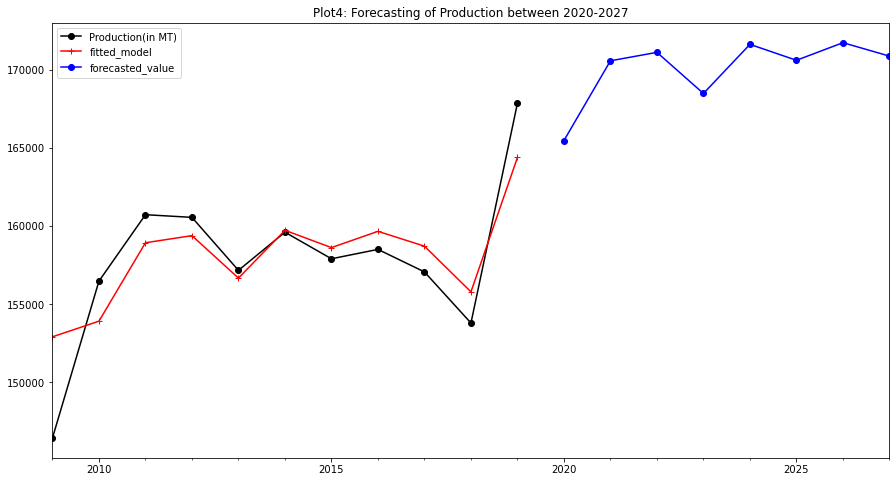

In [13]:
data_to_fit.index = pd.DatetimeIndex(data_to_fit.index.values,freq=data_to_fit.index.inferred_freq)
#Using Holt's Winter model for forecasting future expected import quantities
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data_to_fit['Production(in MT)'][8:19], trend = 'mul',seasonal = 'add', seasonal_periods = 10, damped = False)
np.warnings.filterwarnings('ignore')
model_fit = model.fit(optimized = True)
fcast = model_fit.forecast(8)
ax = data_to_fit['Production(in MT)'][8:19].plot(marker='o', color='black', figsize=(15,8), legend=True, title = 'Plot4: Forecasting of Production between 2020-2027');
ax.ticklabel_format(style='plain', axis = 'y');
model_fit.fittedvalues.plot(marker='+', ax=ax, color='red', legend=True, label = 'fitted_model');
fcast.plot(marker = 'o', ax=ax, color = 'blue', legend = True, label = 'forecasted_value');

In [14]:
forecasted_values = pd.DataFrame()
yr = []
temp1 = 2020
temp2 = 21
for i in range (0,8):
    temp_str = str(temp1+i)+'-'+str(temp2+i)
    yr.append(temp_str)
val=[]
for x in fcast:
    val.append(x)
forecasted_values['Year'] = yr
forecasted_values['Production(in MT)'] = val
ind = []
for i in range (19, 27):
    ind.append(i)
forecasted_values['index'] = ind
forecasted_values.set_index('index', inplace = True)
temp_data.set_index(temp_data.index, inplace = True)
temp2 = pd.concat([temp_data, forecasted_values])

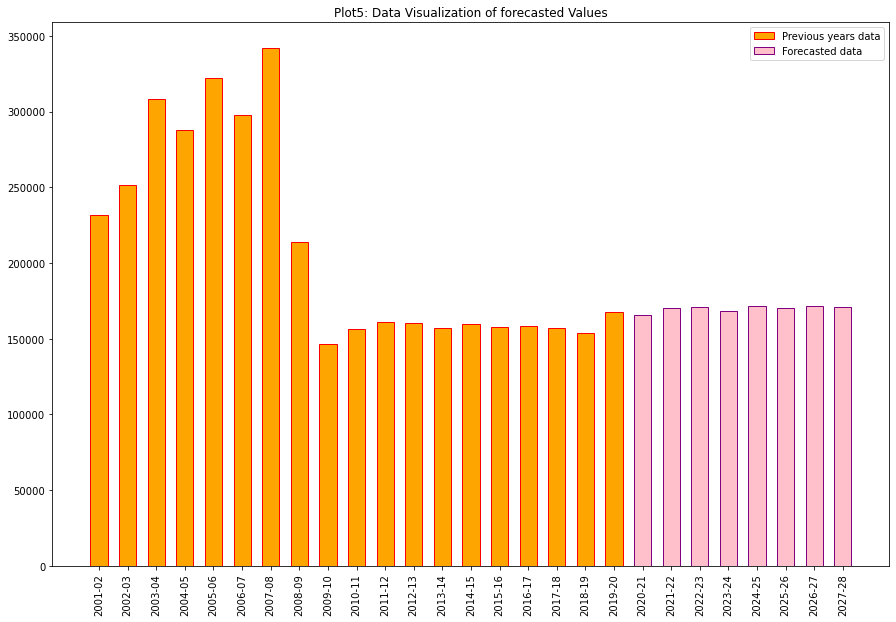

In [15]:
fig = plt.figure(figsize=(15,10))
plt.bar(temp2['Year'][0:19], temp2['Production(in MT)'][0:19],width = 0.6, color = 'orange', edgecolor='red', label = 'Previous years data')
plt.bar(temp2['Year'][19:27], temp2['Production(in MT)'][19:27], width = 0.6, color = 'pink', edgecolor='purple', label = 'Forecasted data')
plt.xticks(temp2['Year'], rotation = 90);
plt.legend();
plt.title('Plot5: Data Visualization of forecasted Values');

In [16]:
i=0
arr =[]
for x in temp2['Production(in MT)']:
    arr.append(int(x))
    i=i+1
temp2['Production(in MT)'] = arr
a = "PRODUCTION DATA"
print("\033[1m",a.center(20), "\033[0m")
temp2[0:18]


   PRODUCTION DATA    


,Year,Production(in MT)
0,2001-02,232005
1,2002-03,251683
2,2003-04,308084
3,2004-05,287901
4,2005-06,321840
5,2006-07,297480
6,2007-08,341810
7,2008-09,214040
8,2009-10,146440
9,2010-11,156480


In [17]:
a = "FORECASTED PRODUCTION DATA"
print("\033[1m",a.center(20), "\033[0m")
temp2[19:27]

 FORECASTED PRODUCTION DATA 


,Year,Production(in MT)
19,2020-21,165476
20,2021-22,170578
21,2022-23,171117
22,2023-24,168487
23,2024-25,171630
24,2025-26,170610
25,2026-27,171736
26,2027-28,170876
